#### Model building process - Linear Regression, Ridge, Lasso, Elasticnet

##### Table of Contents
1. Simple models for Prediction
2. Linear Regression
3. The Line of Best Fit
4. Gradient Descent
5. Using Linear Regression for prediction
6. Evaluate your Model – R square and Adjusted R squared
7. Using all the features for prediction
8. Polynomial Regression
9. Bias and Variance
10. Regularization
11. Ridge Regression
12. Lasso Regression
13. ElasticNet Regression
14. Types of Regularization Techniques [Optional]

In [87]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

train = pd.read_csv("C:\\Myfolders\\Learning\\Python\\Bigmart_SalesIII\\Train_UWu5bXk.csv")
test = pd.read_csv("C:\\Myfolders\\Learning\\Python\\Bigmart_SalesIII\\Test_u94Q5KV.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
#### Lets build model only with two variables - 'Item_MRP', 'Outlet_Establishment_Year'

lreg = LinearRegression()
# Splitting into training set and cv for cross validation

X = train.loc[:,['Item_MRP', 'Outlet_Establishment_Year']]

y = train.Item_Outlet_Sales

x_train,x_val,y_train,y_val = train_test_split(X,y)

# Fit the model
lreg.fit(x_train,y_train)

# Predicting on validation set
pred = lreg.predict(x_val)

# Calculating mse
mse = np.mean((pred - y_val)**2)
mse

1978705.6233497062

In [12]:
# Calculatin Coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Item_MRP,15.305036
1,Outlet_Establishment_Year,-10.895578


In [13]:
# Score the model
lreg.score(x_val,y_val)

0.34239648083897911

In this case, R² is 34%, meaning, only 34% of variance in sales is explained by year of establishment and MRP. In other words, if you know year of establishment and the MRP, you’ll have 34% information to make an accurate prediction about its sales.

#### Linear regression with more variables

In [ ]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
y = train.Item_Outlet_Sales

x_train,x_val,y_train,y_val = train_test_split(X,y)

lreg.fit(x_train,y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype(‘float64’).

It produces an error, because item weights column have some missing values. So let us impute it with the mean of other non-null entries.

In [88]:
# Impute missing values
train['Item_Weight'].fillna((train['Item_Weight'].mean()),inplace=True)

In [24]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]
y = train.Item_Outlet_Sales

x_train,x_val,y_train,y_val = train_test_split(X,y)

lreg.fit(x_train,y_train)

pred = lreg.predict(x_val)

mse = np.mean((pred - y_val)**2)
mse

2162085.527104884

In [25]:
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.596313
1,Item_MRP,15.448512
2,Item_Weight,-1.250607


In [26]:
lreg.score(x_val,y_val)

0.30698468236486398

Therefore we can see that the mse is further increased. There is an decrease in the value R-square, does it mean that the addition of item weight is useful for our model?

#### Using all the features for prediction

In [89]:
# Preprocessing the data as we need only numerical vars in sklearn

# Imputing missing values

train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Size'].fillna('Small',inplace=True)

# Remove Item identifier and Outlet Identifier columns
ls = ['Item_Identifier','Item_Outlet_Sales']
cols = [i for i in train.columns if i not in ls]
train1 = train[cols]

# Creating dummy variables to convert categorical into numeric values

mylist = train1.select_dtypes(include=['object']).columns
dummies = pd.get_dummies(train1[mylist], prefix=mylist)

train1.drop(mylist, axis=1, inplace=True) # drop cat columns from train data

X = pd.concat([train1,dummies], axis=1)

# train1.columns

C:\Users\hiremamr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [90]:
x_train,x_val,y_train,y_val = train_test_split(X,y)

lreg.fit(x_train,y_train)

pred = lreg.predict(x_val)

# mse = mean_squared_error(pred,y_val)
mse = np.mean((pred - y_val)**2)
mse

1267605.8710917365

In [91]:
lreg.score(x_val,y_val)

0.56033198952345575

In [ ]:
# Check variable significance
import statsmodels.formula.api as smf
lm = smf.ols(formula='',data=data).fit()
lm.conf_int()
lm.summary()
lm.rsquared()

When we have a high dimensional data set, it would be highly inefficient to use all the variables since some of them might be imparting redundant information. We would need to select the right set of variables which give us an accurate model as well as are able to explain the dependent variable well. There are multiple ways to select the right set of variables for the model. First among them would be the business understanding and domain knowledge. For instance while predicting sales we know that marketing efforts should impact positively towards sales and is an important feature in your model. We should also take care that the variables we’re selecting should not be correlated among themselves.

Instead of manually selecting the variables, we can automate this process by using forward or backward selection. Forward selection starts with most significant predictor in the model and adds variable for each step. Backward elimination starts with all predictors in the model and removes the least significant variable for each step. Selecting criteria can be set to any statistical measure like R-square, t-stat etc.

#### Interpretation of Regression Plots

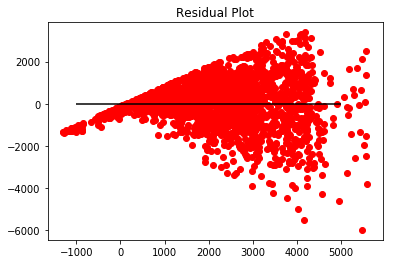

In [92]:
# Residual plot

plt.scatter(pred, (pred - y_val), c='r')
plt.hlines(y=0, xmin=-1000, xmax=5000)
plt.title('Residual Plot')
plt.show()

We can see a funnel like shape in the plot. This shape indicates Heteroskedasticity. The presence of non-constant variance in the error terms results in heteroskedasticity. We can clearly see that the variance of error terms(residuals) is not constant. Generally, non-constant variance arises in presence of outliers or extreme leverage values. These values get too much weight, thereby disproportionately influencing the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

We can easily check this by looking at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern as shown above. This indicates signs of non linearity in the data which has not been captured by the model. I would highly recommend going through this article for a detailed understanding of assumptions and interpretation of regression plots.

In order to capture this non-linear effects, we have another type of regression known as polynomial regression. So let us now understand it.

#### Polynomial Regression

#### Regularization
You have your model ready, you have predicted your output. So why do you need to study regularization? Is it necessary?

Suppose you have taken part in a competition, and in that problem you need to predict a continuous variable. So you applied linear regression and predicted your output. Voila! You are on the leaderboard. But wait what you see is still there are many people above you on the leaderboard. But you did everything right then how is it possible?

“Everything should be made simple as possible, but not simpler – Albert Einstein”

What we did was simpler, everybody else did that, now let us look at making it simple. That is why, we will try to optimize our code with the help of regularization.

In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j. How does reducing the coefficients will help us?

Let us take a look at the coefficients of feature in our above regression model.

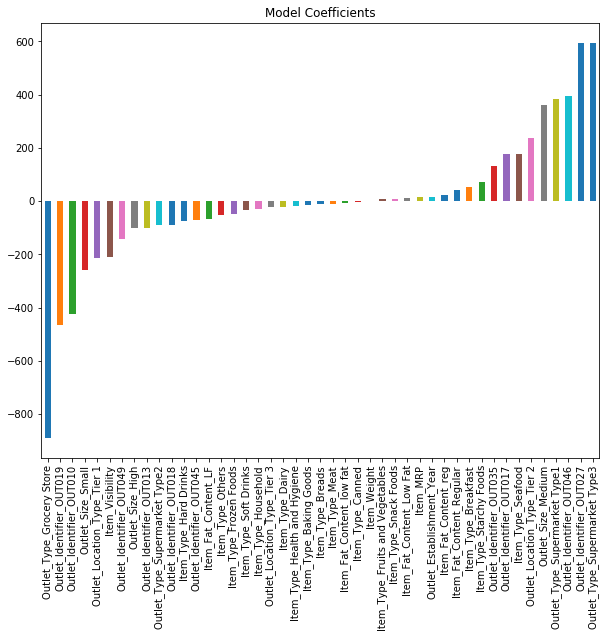

In [93]:
# checking the magnitude of coefficients

predictors = x_train.columns
coeff = Series(lreg.coef_,predictors).sort_values()
coeff.plot(kind='bar',title='Model Coefficients',figsize=(10,8))

We can see that coefficients of Outlet_Identifier_OUT027 and Outlet_Type_Supermarket_Type3(last 2) is much higher as compared to rest of the coefficients. Therefore the total sales of an item would be more driven by these two features.

How can we reduce the magnitude of coefficients in our model? For this purpose, we have different types of regression techniques which uses regularization to overcome this problem. So let us discuss them.

### Ridge Regression

In [94]:
from sklearn.linear_model import Ridge

# Learning Rate = 0.05
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_val)

mse= np.mean((pred - y_val)**2)
print(mse)

ridgeReg.score(x_val,y_val)

1271238.218204793


0.55907211303899063

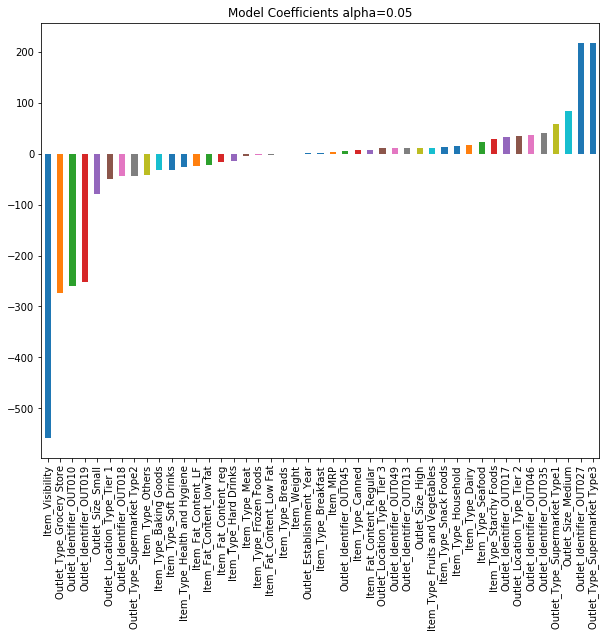

In [109]:
predictors = x_train.columns
coeff = Series(ridgeReg.coef_,predictors).sort_values()
coeff.plot(kind='bar',title='Model Coefficients alpha=0.05',figsize=(10,8))

In [96]:
# Learning Rate = 0.5

ridgeReg = Ridge(alpha=0.5, normalize=True)
ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_val)

mse= np.mean((pred - y_val)**2)
print(mse)

ridgeReg.score(x_val,y_val)

1396782.258291714


0.51552727028383449

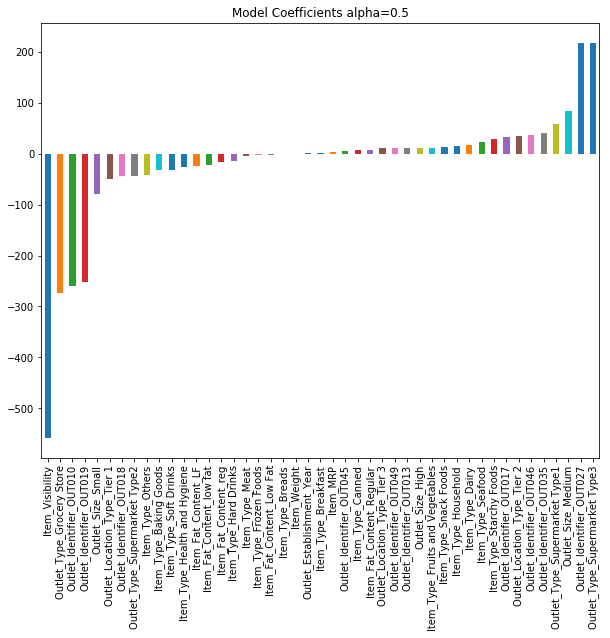

In [108]:
predictors = x_train.columns
coeff = Series(ridgeReg.coef_,predictors).sort_values()
coeff.plot(kind='bar',title='Model Coefficients alpha=0.5',figsize=(10,8))

In [98]:
# Learning Rate = 5

ridgeReg = Ridge(alpha=5, normalize=True)
ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_val)

mse= np.mean((pred - y_val)**2)
print(mse)

ridgeReg.score(x_val,y_val)

2207763.332194179


0.2342391795386114

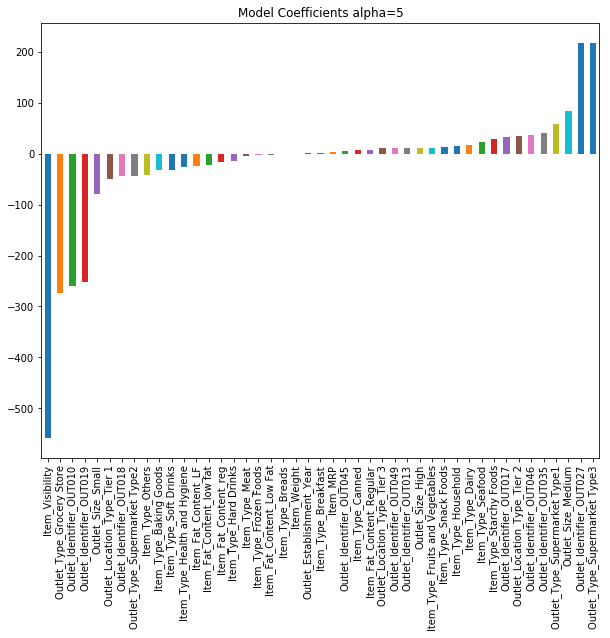

In [107]:
predictors = x_train.columns
coeff = Series(ridgeReg.coef_,predictors).sort_values()
coeff.plot(kind='bar',title='Model Coefficients alpha=5',figsize=(10,8))

**Important Points:**
* It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
* It reduces the model complexity by coefficient shrinkage.
* It uses L2 regularization technique. (which I will discussed later in this article)

Now let us consider another type of regression technique which also makes use of regularization.

### Lasso regression

In [101]:
from sklearn.linear_model import Lasso

# learning Rate = 0.3
lassoReg = Lasso(alpha=0.3,normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_val)

mse = mean_squared_error(pred, y_val)
print(mse)

lassoReg.score(x_val,y_val)



1272475.90775


0.55864282147926814

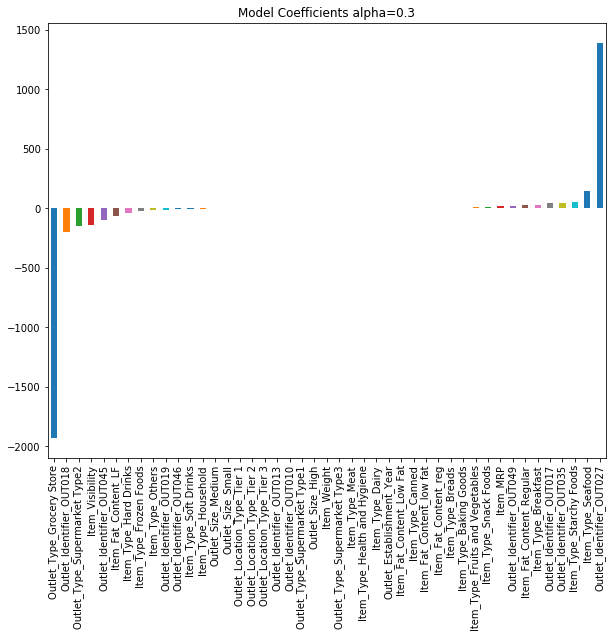

In [106]:
predictors = x_train.columns
coeff = Series(lassoReg.coef_,predictors).sort_values()
coeff.plot(kind='bar',title='Model Coefficients alpha=0.3',figsize=(10,8))

In [103]:
# learning Rate = 0.05
lassoReg = Lasso(alpha=0.05,normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_val)

mse = mean_squared_error(pred, y_val)
print(mse)

lassoReg.score(x_val,y_val)

1267601.99458


0.56033333408835584

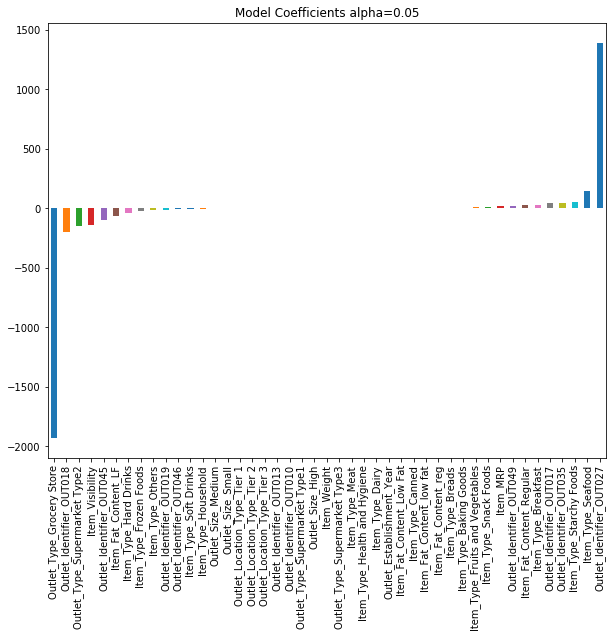

In [105]:
predictors = x_train.columns
coeff = Series(lassoReg.coef_,predictors).sort_values()
coeff.plot(kind='bar',title='Model Coefficients alpha=0.05',figsize=(10,8))

**Important Points:**
* It uses L1 regularization technique (will be discussed later in this article)
* It is generally used when we have more number of features, because it automatically does feature selection.

Now that you have a basic understanding of ridge and lasso regression, let’s think of an example where we have a large dataset, lets say it has 10,000 features. And we know that some of the independent features are correlated with other independent features. Then think, which regression would you use, Rigde or Lasso?

Let’s discuss it one by one. If we apply ridge regression to it, it will retain all of the features but will shrink the coefficients. But the problem is that model will still remain complex as there are 10,000 features, thus may lead to poor model performance.

Instead of ridge what if we apply lasso regression to this problem. The main problem with lasso regression is when we have correlated variables, it retains only one variable and sets other correlated variables to zero. That will possibly lead to some loss of information resulting in lower accuracy in our model.

Then what is the solution for this problem? Actually we have another type of regression, known as elastic net regression, which is basically a hybrid of ridge and lasso regression. So let’s try to understand it.

### Elastic Net Regression

In [112]:
from sklearn.linear_model import ElasticNet

# Alpha=1, l1+ratio=0.5
ENReg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENReg.fit(x_train,y_train)

pred = ENReg.predict(x_val)

mse = mean_squared_error(pred, y_val)
print(mse)

ENReg.score(x_val,y_val)

1547596.09224


0.46321762117580184

So we get the value of R-Square, which is very less than both ridge and lasso. Can you think why? The reason behind this downfall is basically we didn’t have a large set of features. Elastic regression generally works well when we have a **big dataset.**

Note, here we had two parameters alpha and l1_ratio. First let’s discuss, what happens in elastic net, and how it is different from ridge and lasso.

Let alpha (or a+b) = 1, and now consider the following cases:

* If l1_ratio =1, therefore if we look at the formula of l1_ratio, we can see that l1_ratio can only be equal to 1 if a=1, which implies b=0. Therefore, it will be a lasso penalty.
* Similarly if l1_ratio = 0, implies a=0. Then the penalty will be a ridge penalty.
* For l1_ratio between 0 and 1, the penalty is the combination of ridge and lasso.

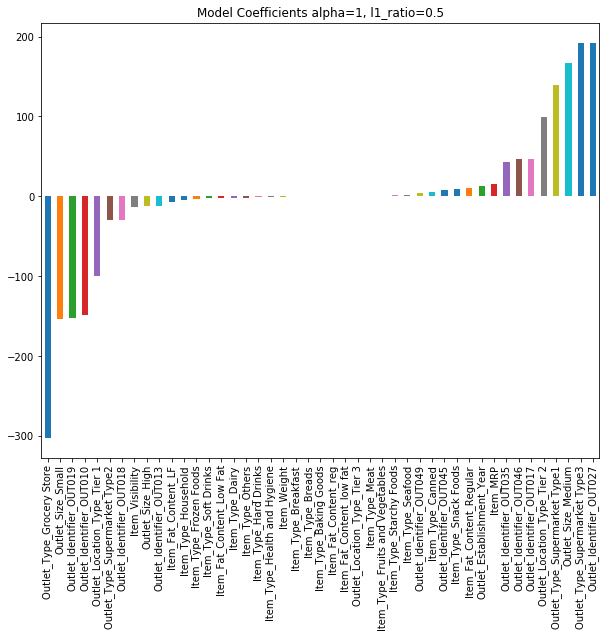

In [113]:
predictors = x_train.columns
coeff = Series(ENReg.coef_,predictors).sort_values()
coeff.plot(kind='bar',title='Model Coefficients alpha=1, l1_ratio=0.5',figsize=(10,8))

In [114]:
# Alpha=1, l1+ratio=1
ENReg = ElasticNet(alpha=1, l1_ratio=1, normalize=False)

ENReg.fit(x_train,y_train)

pred = ENReg.predict(x_val)

mse = mean_squared_error(pred, y_val)
print(mse)

ENReg.score(x_val,y_val)

1266878.53577


0.56058426515526361

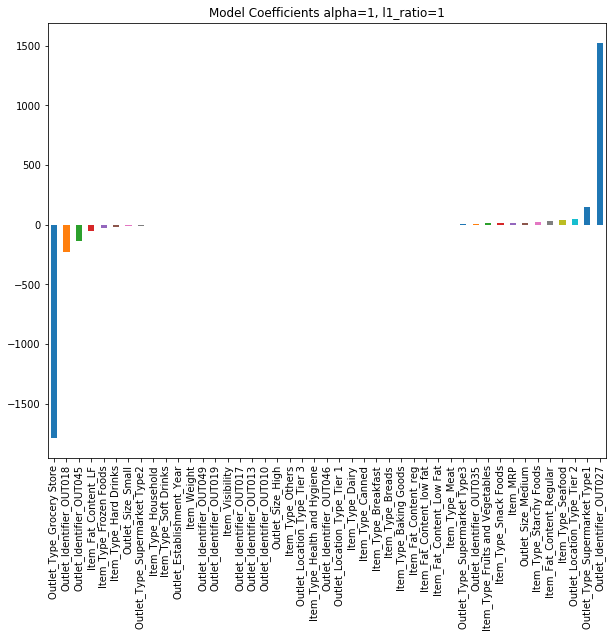

In [116]:
predictors = x_train.columns
coeff = Series(ENReg.coef_,predictors).sort_values()
coeff.plot(kind='bar',title='Model Coefficients alpha=1, l1_ratio=1',figsize=(10,8))

In [117]:
# Alpha=1, l1+ratio=0
ENReg = ElasticNet(alpha=1, l1_ratio=0, normalize=False)

ENReg.fit(x_train,y_train)

pred = ENReg.predict(x_val)

mse = mean_squared_error(pred, y_val)
print(mse)

ENReg.score(x_val,y_val)

1680014.34006


C:\Users\hiremamr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.41728846535723763

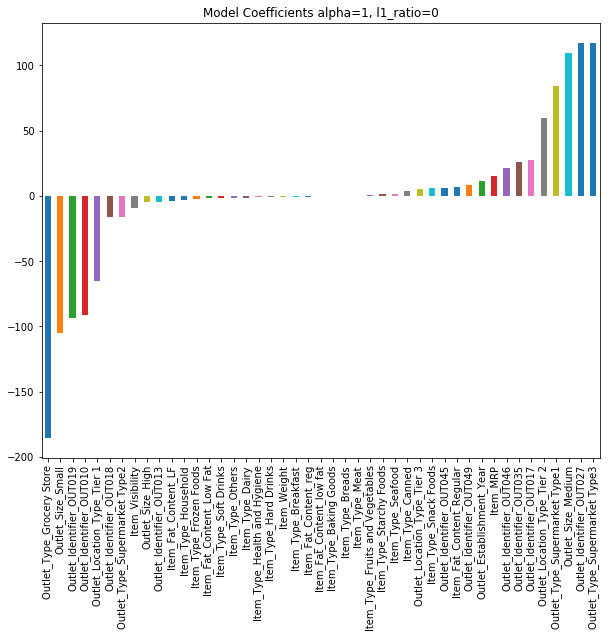

In [118]:
predictors = x_train.columns
coeff = Series(ENReg.coef_,predictors).sort_values()
coeff.plot(kind='bar',title='Model Coefficients alpha=1, l1_ratio=0',figsize=(10,8))